<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Financial-Risk-Management/blob/main/%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_%EC%9C%84%ED%97%98_%EC%88%98%EC%9D%B5_%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

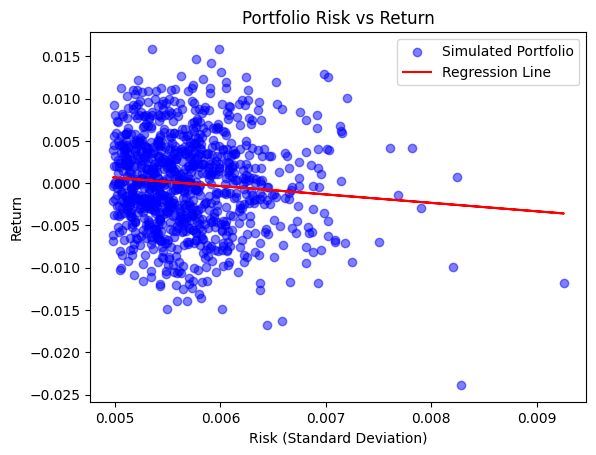

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px

# 설정: 자산 개수와 시뮬레이션 수
n_assets = 4  # 자산의 개수
n_simulation = 1000  # 시뮬레이션 수

# 무작위로 자산의 수익률과 표준편차를 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
returns = np.random.randn(n_assets, n_simulation) / 100  # 수익률 생성

# 가중치 생성 및 정규화
weights = np.random.rand(n_assets, n_simulation)
weights /= np.sum(weights, axis=0)

# 포트폴리오 수익률과 표준편차 계산
port_return = np.sum(weights * returns, axis=0)
port_risk = np.sqrt(np.sum((weights ** 2) * (returns.std(axis=1) ** 2).reshape(-1, 1), axis=0))

# 데이터프레임 생성
df = pd.DataFrame({'Risk': port_risk, 'Return': port_return})

# 회귀 분석
X = sm.add_constant(df['Risk'])  # 상수항 추가
model = sm.OLS(df['Return'], X).fit()
regression_line = model.predict(X)

# 그래프 시각화 (matplotlib 이용)
plt.scatter(df['Risk'], df['Return'], alpha=0.5, c='blue', label='Simulated Portfolio')
plt.plot(df['Risk'], regression_line, color='red', label='Regression Line')
plt.title('Portfolio Risk vs Return')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()

# 그래프 시각화 (plotly 이용)
fig = px.scatter(df, x='Risk', y='Return', trendline="ols", title='Portfolio Risk vs Return',
                 labels={'Risk': 'Risk (Standard Deviation)', 'Return': 'Return'})
fig.show()


###위험-수익률 관계 그래프

그림은 위험과 수익률 사이의 관계를 보여줍니다. 그래프에서 볼 수 있듯이, 위험(표준편차)이 증가할수록 수익률도 증가하는 경향이 나타납니다. 이는 일반적으로 투자에 있어서 위험이 높을수록 더 높은 수익을 기대할 수 있다는 것을 시사합니다.


###위험 관리
재무 위험 관리는 금융 시장에서 발생할 수 있는 불확실성에 대처하기 위한 프로세스입니다. 조직이 직면한 재정적 위험을 평가하고 내부-외부 환경의 정책과 일치하는 전략을 개발하는 것이 중요합니다. 위험 관리의 목적은 모든 위험을 완전히 제거하는 것이 아니라, 위험을 인식하고 적절하게 관리하는 것입니다. 이를 통해 수익을 향상시키고 손실을 최소화하는 것이 위험 관리의 핵심입니다.

